This cell installs the required libraries, `torch` and `torchvision`, using the pip package manager. `torch` is a deep learning framework, and `torchvision` provides datasets, model architectures, and image transformations for computer vision.

In [1]:
%pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

This cell imports the necessary libraries for building and training the Vision Transformer model.
- `torch`: The main deep learning library.
- `torchvision`: Provides datasets and transformations.
- `matplotlib.pyplot`: Used for plotting, although not used in the subsequent code shown, it's a common library for visualization in PyTorch projects.
- `torchvision.transforms`: Contains image transformation operations.
- `torch.utils.data.dataloader`: Provides utilities for loading data in batches.
- `torch.nn`: Contains modules and classes for building neural networks.

In [2]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch.utils.data as dataloader
import torch.nn as nn

Preparing a Vision Transformer from Scratch using PyTorch is a great way to clear and understand the fundamentals of the Transformer Architecture

This cell defines a transformation to convert the PIL images from the MNIST dataset into PyTorch tensors.
- `transforms.Compose`: This is a container for chaining multiple image transformations together.
- `transforms.ToTensor()`: This transformation converts a PIL Image or a NumPy array into a PyTorch tensor. It also scales the pixel values to be between 0 and 1.

In [3]:
transformation_operation = transforms.Compose([transforms.ToTensor()])

This cell loads the MNIST dataset, which is a widely used dataset of handwritten digits.
- `torchvision.datasets.MNIST`: This class downloads and loads the MNIST dataset.
- `root='./data'`: Specifies the directory where the dataset will be downloaded.
- `train=True`: Specifies that the training set should be downloaded and loaded.
- `download=True`: If the dataset is not already present in the `root` directory, it will be downloaded.
- `transform=transformation_operation`: Applies the previously defined `transformation_operation` to the images.
- `train=False`: Specifies that the test/validation set should be downloaded and loaded.

In [4]:
#Getting PIL Data
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transformation_operation)
val_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transformation_operation)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 493kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.67MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.74MB/s]


This cell defines various hyperparameters and configuration settings for the Vision Transformer model and the training process.
- `batch_size`: The number of samples in each training batch.
- `num_classes`: The number of output classes (10 for digits 0-9).
- `num_channels`: The number of color channels in the input images (1 for grayscale MNIST images).
- `img_size`: The height and width of the input images (28x28 pixels).
- `patch_size`: The size of the square patches the input image will be divided into (7x7 pixels).
- `patch_num`: The total number of patches in the image. Calculated as (image_size / patch_size)^2.
- `attention_heads`: The number of attention heads in the Multi-Head Attention layers.
- `embed_dim`: The dimensionality of the embedding space for each patch.
- `transformer_blocks`: The number of Transformer Encoder blocks in the model.
- `mlp_nodes`: The number of nodes in the hidden layer of the MLP (Multilayer Perceptron) within the Transformer blocks.
- `learning_rate`: The learning rate for the optimizer.
- `epochs`: The number of training epochs.

In [5]:
batch_size = 64
num_classes = 10
num_channels = 1
img_size = 28
patch_size = 7
patch_num = int((img_size / patch_size) * (img_size / patch_size))
attention_heads = 4
embed_dim = 20
transformer_blocks = 4
mlp_nodes = 64
learning_rate = 0.001

This cell uses the `DataLoader` to create iterable objects for the training and validation datasets. This allows for efficient loading of data in batches during training and evaluation.
- `dataloader.DataLoader`: Creates a data loader.
- `train_dataset` and `val_dataset`: The datasets to load.
- `shuffle=True`: Shuffles the training data in each epoch for better training.
- `batch_size`: Specifies the batch size.

In [6]:
#Using Dataloader to prepare data for the neural network
train_data = dataloader.DataLoader(train_dataset, shuffle=True, batch_size = batch_size)
val_data = dataloader.DataLoader(val_dataset, shuffle=True, batch_size = batch_size)

This cell defines the `PatchEmbedding` class, which is responsible for converting the input image into a sequence of flattened patches and then linearly projecting them into a higher-dimensional embedding space.
- `nn.Conv2d`: A 2D convolutional layer is used to extract patches. The `kernel_size` and `stride` are set to `patch_size` to effectively create non-overlapping patches. The number of output channels is `embed_dim`.
- `flatten(2)`: Flattens the output of the convolutional layer starting from the second dimension. This reshapes the patches into a sequence of vectors.
- `transpose(1,2)`: Transposes the dimensions to get the shape `(batch_size, num_patches, embed_dim)`, which is the expected input format for the Transformer Encoder.

In [7]:
class PatchEmbedding(nn.Module):
  def __init__(self, patch_size, embed_dim):
    super().__init__()
    self.patch_embed = nn.Conv2d(num_channels, embed_dim, kernel_size=patch_size, stride=patch_size)

  def forward(self, x):
    x = self.patch_embed(x)
    x = x.flatten(2)
    x = x.transpose(1,2)
    return x



This cell defines the `TransformerBlock` class, which is a core component of the Vision Transformer. It consists of a Multi-Head Self-Attention layer and a position-wise Feed-Forward Network (MLP), with Layer Normalization and residual connections.
- `nn.LayerNorm`: Applies Layer Normalization, which normalizes the inputs across the features for each sample independently.
- `nn.MultiheadAttention`: Performs Multi-Head Self-Attention. It takes the input, query, key, and value as input and outputs the attention scores and weights. `batch_first=True` means the input tensors have the batch dimension as the first dimension.
- `nn.Sequential`: A container for sequentially executing a list of modules.
- `nn.Linear`: A linear (fully connected) layer.
- `nn.GELU()`: The Gaussian Error Linear Unit activation function.
- Residual connections (`x = x + residual`): Add the input of a sub-layer to its output, helping with gradient flow during training.

In [8]:
class TransformerBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_norm1 = nn.LayerNorm(embed_dim)
        self.multi_head_attention = nn.MultiheadAttention(embed_dim, attention_heads, batch_first = True)
        self.layer_norm2 = nn.LayerNorm(embed_dim)
        self.mlp = nn.Sequential(
            nn.Linear(embed_dim, mlp_nodes),
            nn.GELU(),
            nn.Linear(mlp_nodes, embed_dim)
        )

    def forward(self, x):
        residual1 = x
        x = self.layer_norm1(x)
        x, _ = self.multi_head_attention(x, x, x)
        x = x + residual1
        residual2 = x
        x = self.layer_norm2(x)
        x = self.mlp(x) + residual2
        return x

This cell defines the `MLP_Head` class, which is the classification head of the Vision Transformer. It takes the output corresponding to the class token from the Transformer Encoder and maps it to the final class probabilities.
- `nn.LayerNorm`: Applies Layer Normalization before the linear classification layer.
- `nn.Linear`: A linear layer that maps the embedded representation of the class token to the number of output classes (`num_classes`).

In [9]:
class MLP_Head(nn.Module):
    def __init__(self):
        super().__init__()
        self.layernorm1 = nn.LayerNorm(embed_dim)
        self.mlphead = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        x = self.layernorm1(x)
        x = self.mlphead(x)
        return x

This cell defines the main `VisionTransformer` class, which combines all the previously defined components to form the complete model.
- `PatchEmbedding`: The patch embedding layer.
- `cls_token`: A learnable class token (a learnable parameter) that is prepended to the sequence of patch embeddings. Its output after the Transformer blocks is used for classification.
- `pos_embedding`: A learnable positional embedding that is added to the patch embeddings to incorporate positional information.
- `transformer_blocks`: The sequence of Transformer Encoder blocks.
- `mlp_head`: The classification head.
- `forward(self, x)`: Defines the forward pass of the model, describing how the input `x` (the image tensor) is processed through the different layers.
    - The input image is first passed through the `patch_embedding`.
    - The `cls_token` is expanded to match the batch size and concatenated with the patch embeddings.
    - The `pos_embedding` is added to the combined sequence.
    - The sequence is then passed through the `transformer_blocks`.
    - `x[:, 0]` selects the output corresponding to the class token (the first element in the sequence).
    - The selected class token output is passed through the `mlp_head` to get the final class predictions.

In [10]:
class VisionTransformer(nn.Module):
    def __init__(self):
        super().__init__()
        self.patch_embedding = PatchEmbedding(patch_size, embed_dim)
        self.cls_token = nn.Parameter(torch.randn(1, 1, embed_dim))
        self.pos_embedding = nn.Parameter(torch.randn(1, patch_num + 1, embed_dim))
        self.transformer_blocks = nn.Sequential(*[TransformerBlock() for _ in range(transformer_blocks)])
        self.mlp_head = MLP_Head()

    def forward(self, x):
        x = self.patch_embedding(x)
        B = x.shape[0]
        cls_token = self.cls_token.expand(B, -1, -1)
        x = torch.cat((cls_token, x), dim=1)
        x = x + self.pos_embedding
        x = self.transformer_blocks(x)
        x = x[:, 0]  # Select the class token output
        x = self.mlp_head(x)
        return x


This cell initializes the Vision Transformer model, sets up the optimizer, and defines the loss function.
- `device`: Checks if a CUDA-enabled GPU is available and sets the device accordingly. If not, it uses the CPU.
- `VisionTransformer().to(device)`: Creates an instance of the `VisionTransformer` model and moves it to the selected device.
- `torch.optim.Adam`: The Adam optimizer is used to update the model's parameters during training.
- `criterion = nn.CrossEntropyLoss()`: The Cross-Entropy Loss is used as the loss function, which is suitable for multi-class classification problems.

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VisionTransformer().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

This cell contains the training loop for the Vision Transformer model. It iterates over the specified number of epochs and processes the training data in batches.
- `model.train()`: Sets the model to training mode. This enables features like dropout and batch normalization that are specific to training.
- `optimizer.zero_grad()`: Clears the gradients of the model's parameters.
- `outputs = model(images)`: Performs the forward pass, feeding the input images through the model to get the predictions.
- `loss = criterion(outputs, labels)`: Calculates the loss between the model's predictions and the true labels.
- `loss.backward()`: Performs backpropagation to calculate the gradients of the loss with respect to the model's parameters.
- `optimizer.step()`: Updates the model's parameters using the calculated gradients and the optimizer.
- `total_loss`, `correct_epoch`, `total_epoch`: Variables to track the total loss and accuracy over each epoch.
- `preds = outputs.argmax(dim=1)`: Gets the predicted class by finding the index of the maximum value in the output probabilities.
- `correct = (preds == labels).sum().item()`: Calculates the number of correctly predicted samples in the current batch.
- `accuracy = 100.0 * correct / labels.size(0)`: Calculates the accuracy for the current batch.
- The code prints the loss and accuracy for every 100 batches and a summary of the total loss and accuracy at the end of each epoch.

In [12]:
for epoch in range(5):
    model.train()
    total_loss = 0
    correct_epoch = 0
    total_epoch = 0
    print(f"\nEpoch {epoch+1}")

    for batch_idx, (images, labels) in enumerate(train_data):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss+=loss.item()
        preds = outputs.argmax(dim=1)

        correct = (preds == labels).sum().item()
        accuracy = 100.0 * correct / labels.size(0)

        correct_epoch += correct
        total_epoch += labels.size(0)

        if batch_idx % 100 == 0:
            print(f"  Batch {batch_idx+1:3d}: Loss = {loss.item():.4f}, Accuracy = {accuracy:.2f}%")

    epoch_acc = 100.0 * correct_epoch / total_epoch
    print(f"==> Epoch {epoch+1} Summary: Total Loss = {total_loss:.4f}, Accuracy = {epoch_acc:.2f}%")


Epoch 1
  Batch   1: Loss = 2.2950, Accuracy = 15.62%
  Batch 101: Loss = 0.7399, Accuracy = 81.25%
  Batch 201: Loss = 0.6399, Accuracy = 81.25%
  Batch 301: Loss = 0.7057, Accuracy = 82.81%
  Batch 401: Loss = 0.4935, Accuracy = 89.06%
  Batch 501: Loss = 0.2648, Accuracy = 90.62%
  Batch 601: Loss = 0.1710, Accuracy = 93.75%
  Batch 701: Loss = 0.2027, Accuracy = 89.06%
  Batch 801: Loss = 0.1725, Accuracy = 93.75%
  Batch 901: Loss = 0.3583, Accuracy = 89.06%
==> Epoch 1 Summary: Total Loss = 418.6767, Accuracy = 85.44%

Epoch 2
  Batch   1: Loss = 0.1305, Accuracy = 98.44%
  Batch 101: Loss = 0.3189, Accuracy = 90.62%
  Batch 201: Loss = 0.3366, Accuracy = 87.50%
  Batch 301: Loss = 0.2114, Accuracy = 92.19%
  Batch 401: Loss = 0.2716, Accuracy = 92.19%
  Batch 501: Loss = 0.1788, Accuracy = 96.88%
  Batch 601: Loss = 0.2555, Accuracy = 93.75%
  Batch 701: Loss = 0.1188, Accuracy = 96.88%
  Batch 801: Loss = 0.0921, Accuracy = 93.75%
  Batch 901: Loss = 0.0924, Accuracy = 96.88%


This cell evaluates the trained Vision Transformer model on the validation dataset.
- `model.eval()`: Sets the model to evaluation mode. This disables features like dropout that are specific to training.
- `with torch.no_grad()`: Disables gradient calculation, which is not needed during evaluation and saves memory and computation.
- The loop iterates over the validation data in batches.
- `outputs = model(images)`: Performs the forward pass on the validation images.
- `preds = outputs.argmax(dim=1)`: Gets the predicted class.
- `correct += (preds == labels).sum().item()`: Accumulates the number of correct predictions.
- `total += labels.size(0)`: Accumulates the total number of samples.
- `test_acc = 100.0 * correct / total`: Calculates the overall accuracy on the validation set.
- The final validation accuracy is printed.

In [13]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in val_data:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

test_acc = 100.0 * correct / total
print(f"\n==> Val Accuracy: {test_acc:.2f}%")



==> Val Accuracy: 96.12%


This cell visualizes some predictions of the trained model on a batch of validation images.
- `model.eval()`: Sets the model to evaluation mode.
- `images, labels = next(iter(val_data))`: Gets a batch of images and labels from the validation data loader.
- `images, labels = images.to(device), labels.to(device)`: Moves the images and labels to the appropriate device (GPU or CPU).
- `with torch.no_grad()`: Disables gradient calculation.
- `outputs = model(images)`: Gets the model's predictions for the batch.
- `preds = outputs.argmax(dim=1)`: Gets the predicted class for each image.
- `plt.figure(figsize=(12, 4))`: Creates a figure for plotting.
- The loop iterates through the first 20 images in the batch.
- `plt.subplot(4, 5, i+1)`: Creates a subplot for each image.
- `plt.imshow(images[i].squeeze(), cmap='gray')`: Displays the grayscale image. `.squeeze()` removes the channel dimension (which is 1 for grayscale).
- `plt.title(f"Pred: {preds[i].item()}\nTrue: {labels[i].item()}")`: Sets the title of each subplot to show the model's prediction and the true label.
- `plt.axis('off')`: Hides the axes.
- `plt.tight_layout()`: Adjusts the spacing between subplots.
- `plt.show()`: Displays the plot.

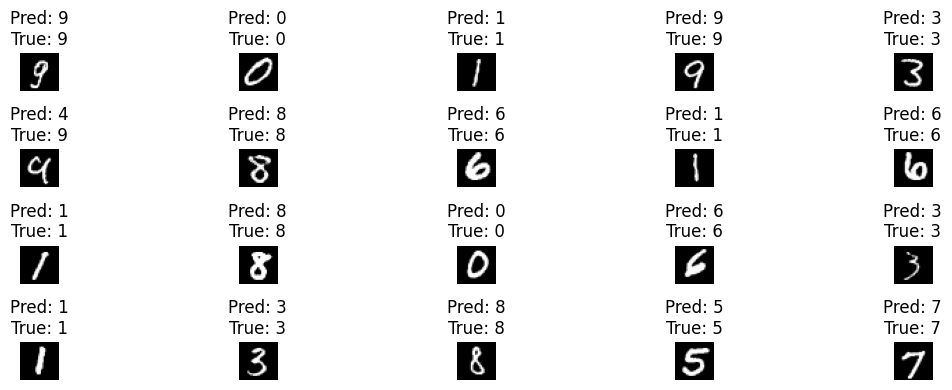

In [15]:
model.eval()
images, labels = next(iter(val_data))
images, labels = images.to(device), labels.to(device)

with torch.no_grad():
    outputs = model(images)
    preds = outputs.argmax(dim=1)

# Plot 10 test images with predictions
plt.figure(figsize=(12, 4))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(images[i].squeeze().cpu(), cmap='gray')
    plt.title(f"Pred: {preds[i].item()}\nTrue: {labels[i].item()}")
    plt.axis('off')
plt.tight_layout()
plt.show()

This cell performs a quick test to demonstrate the shape transformations of the input image as it passes through the `PatchEmbedding` layer.
- `images, labels = next(iter(train_data))`: Gets a batch of images and labels from the training data loader.
- `patch_embed = nn.Conv2d(num_channels, embed_dim, kernel_size=patch_size, stride=patch_size)`: Creates an instance of the convolutional layer used for patch embedding.
- `embedded_image = patch_embed(images)`: Passes the images through the convolutional layer.
- The `print` statements show the shape of the original images, the output after the convolutional layer, the shape after flattening, and the shape after transposing, illustrating how the image is transformed into a sequence of patch embeddings.

This is an empty code cell. It doesn't perform any action.